In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("aapl_datetime_data.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,7/7/2017,142.90,144.75,142.90,144.18,19201712
1,7/6/2017,143.02,143.50,142.41,142.73,24128782
2,7/5/2017,143.69,144.79,142.72,144.09,21569557
3,7/3/2017,144.88,145.30,143.10,143.50,14277848
4,6/30/2017,144.45,144.96,143.78,144.02,23024107


In [3]:
type(df.Date[0]) # bu veri tarih olmasına rağmen type stringtir. 

str

In [4]:
# tarihi düzenlemek için
df=pd.read_csv("aapl_datetime_data.csv", parse_dates=["Date"])
df.head()

,Date,Open,High,Low,Close,Volume
0,2017-07-07,142.90,144.75,142.90,144.18,19201712
1,2017-07-06,143.02,143.50,142.41,142.73,24128782
2,2017-07-05,143.69,144.79,142.72,144.09,21569557
3,2017-07-03,144.88,145.30,143.10,143.50,14277848
4,2017-06-30,144.45,144.96,143.78,144.02,23024107


In [5]:
type(df.Date[0]) # veri türü zaman olarak değişir

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
# index sütünunu tarih olarak ayarlarsak 
df=pd.read_csv("aapl_datetime_data.csv", parse_dates=["Date"], index_col="Date")
df.index

DatetimeIndex(['2017-07-07', '2017-07-06', '2017-07-05', '2017-07-03',
               '2017-06-30', '2017-06-29', '2017-06-28', '2017-06-27',
               '2017-06-26', '2017-06-23',
               ...
               '2016-07-22', '2016-07-21', '2016-07-20', '2016-07-19',
               '2016-07-18', '2016-07-15', '2016-07-14', '2016-07-13',
               '2016-07-12', '2016-07-11'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [10]:
# Bu tarz büyük verilerde belirli bir tarihte olan bazı veri değerlerinin ortalaması hesaplanabilir.
# apple hissesinin 2017 yılı ocak ayındaki ortalama değerini bulalım.
df["2017-01"].Close.mean()

C:\Users\ispir\AppData\Local\Temp/ipykernel_8376/1959570998.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df["2017-01"].Close.mean()


119.57000000000001

**Resample**
Örneğin 1 aylık veri almak isteniyor. Bu durumda günlük hisse senedi ile ilgilenilmiyor ve aylık hisse senedi fiyatları ilgilendirir.


In [11]:
df.Close.resample('M').mean() # M -> mounth

Date
2016-07-31     99.473333
2016-08-31    107.665217
2016-09-30    110.857143
2016-10-31    115.707143
2016-11-30    110.154286
2016-12-31    114.335714
2017-01-31    119.570000
2017-02-28    133.713684
2017-03-31    140.617826
2017-04-30    142.886842
2017-05-31    152.227727
2017-06-30    147.831364
2017-07-31    143.625000
Freq: M, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

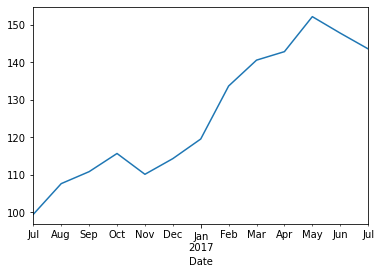

In [13]:
# Bu veri durumunu görselleştirmek için
%matplotlib inline
df.Close.resample('M').mean().plot()

<AxesSubplot:xlabel='Date'>

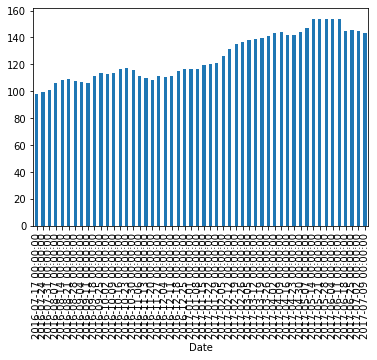

In [16]:
# görselleştirme faklı şekillerde de yapılabilir
%matplotlib inline
df.Close.resample('W').mean().plot(kind='bar')
# W -> weekly gibi birden fazla yedinden örnekleme yapılabilir.

In [22]:
df2=pd.read_csv("aapl_datetime_data.csv")
df2=df2.drop(['Date'],axis=1)
df2.head()

,Open,High,Low,Close,Volume
0,142.90,144.75,142.90,144.18,19201712
1,143.02,143.50,142.41,142.73,24128782
2,143.69,144.79,142.72,144.09,21569557
3,144.88,145.30,143.10,143.50,14277848
4,144.45,144.96,143.78,144.02,23024107


In [43]:
# Veri setinde tarihler olmadığı durumda bu tarih aralığı belirlenebilir.
rng= pd.date_range(start="6/1/2016",end="5/17/2017", freq='B')
# başlangıç terihi, bitiş tarihi ve sıklık (frekans) olarak B yani business days (haftasonları alınmaz)
rng

DatetimeIndex(['2016-06-01', '2016-06-02', '2016-06-03', '2016-06-06',
               '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-10',
               '2016-06-13', '2016-06-14',
               ...
               '2017-05-04', '2017-05-05', '2017-05-08', '2017-05-09',
               '2017-05-10', '2017-05-11', '2017-05-12', '2017-05-15',
               '2017-05-16', '2017-05-17'],
              dtype='datetime64[ns]', length=251, freq='B')

In [27]:
len(df2)

251

In [44]:
len(rng) # uzunluklar eşit olmalı

251

In [45]:
# bu oluşturulan tarih aralığını veri setinde index olarak kullanmak için;
df2.set_index(rng, inplace=True)
df2.head()

,Open,High,Low,Close,Volume
2016-06-01,142.90,144.75,142.90,144.18,19201712
2016-06-02,143.02,143.50,142.41,142.73,24128782
2016-06-03,143.69,144.79,142.72,144.09,21569557
2016-06-06,144.88,145.30,143.10,143.50,14277848
2016-06-07,144.45,144.96,143.78,144.02,23024107


<AxesSubplot:>

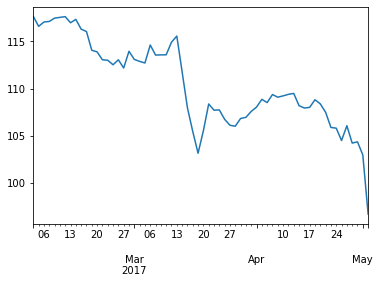

In [50]:
%matplotlib inline
df2["2017-02-02":"2017-05-02"].Close.plot()
# belirli tarih aralığı görselleştirilebilir 

Tarihler eklenirken tatil günlerin de hesaba katılması gerekebilir. 
Girilen tarihlerden ülkeye göre tatil tarihleri çıkarılmak istenirse
amerika için bu tatilleri pandas kullanmak için kullanılacak bazı kütüphaneler var;

from pandas.tseries.holiday import USFederalHolidayCalendar

from pandas.tseries.offsets import CustomBusinessDay

usb= CustomBusinessDay(calendar= USFederalHolidayCalendar())

bu durumda bir tarih aralığı seçildiğinde bu usb değişkeni kullanılırsa içerisinde bulunan tatil günleri çıkarılmış olur.


In [52]:
rng= pd.date_range(start="7/1/2016",end="7/21/2017", freq='B')
rng

DatetimeIndex(['2016-07-01', '2016-07-04', '2016-07-05', '2016-07-06',
               '2016-07-07', '2016-07-08', '2016-07-11', '2016-07-12',
               '2016-07-13', '2016-07-14',
               ...
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', length=276, freq='B')

In [53]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

usb= CustomBusinessDay(calendar= USFederalHolidayCalendar())
usb

<CustomBusinessDay>

In [55]:
# 07-04 amerika için bir tatil günüdür. (bağımsızlık günü) bunun artık tarih aralığı oluşturulurken alınmaması gerekiyor.
rng= pd.date_range(start="7/1/2016",end="7/21/2017", freq=usb)
rng

DatetimeIndex(['2016-07-01', '2016-07-05', '2016-07-06', '2016-07-07',
               '2016-07-08', '2016-07-11', '2016-07-12', '2016-07-13',
               '2016-07-14', '2016-07-15',
               ...
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', length=265, freq='C')